In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
from torchvision import transforms
import torchvision.transforms.functional as tv

import sys
import os

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen

import matplotlib.pyplot as plt

/Users/iskriyanavasileva/opt/anaconda3/envs/deep-food/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/iskriyanavasileva/opt/anaconda3/envs/deep-food/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/iskriyanavasileva/opt/anaconda3/envs/deep-food/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

# Pillow

In [ ]:
im_tom = Image.open("./test_images/tomatoes.jpeg")
im_tom = im_tom.resize((200,200))
im_tom

In [ ]:
im_fl = Image.open("./test_images/flour.jpg")
im_fl = im_fl.resize((200,200))
im_fl

In [ ]:
bg1 = Image.open("./test_images/background_fridge.jpg")
bg1 = bg1.resize((200,200))
bg1

In [ ]:
bg2 = Image.open("./test_images/background_table.jpg")
#bg2 = tf.image.resize(bg2,[200,200])
bg2 = bg2.resize((200,200))
bg2

In [ ]:
testim = Image.open("./test_images/messi5.jpeg")
#testim = testim.resize((200,200))
testim

In [ ]:
testim2 = Image.open("./test_images/opencv_logo.png")
#testim2 = testim.resize((200,200))
testim2

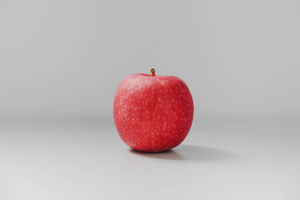

In [77]:
im_apple = Image.open("./test_images/apple.jpeg")
im_apple = im_apple.resize((300,200))
im_apple

In [ ]:
list_images = []

for root, dirs, files in os.walk('./test_images'):
    for file in files:
        file_path = f'{os.getcwd()}/test_images/{file}' # there is a cleaner way to do it
        list_images.append(file_path)
list_images

In [ ]:
images = [Image.open(x) for x in list_images]

widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

In [ ]:
new_im = Image.new('RGB', (total_width,max_height))

In [ ]:
x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test.jpg')

In [ ]:
#for elem in list_images:
#    for i in range(0, 1200, 1200):
#        im = Image.open(elem)
#        new_im.paste(im, (i,0))
#    new_im.save('test.jpeg')

In [ ]:
im_test = Image.open("./test.jpg")
im_test

# Tensorflow

In [ ]:
im_tom_tf = tf.convert_to_tensor(im_tom)
im_fl_tf = tf.convert_to_tensor(im_fl)

In [ ]:
#test2 = tf.concat((im_tom_tf,im_fl_tf), axis=4);

In [ ]:
#test2

# Pytorch

In [ ]:
p = transforms.Compose([transforms.Scale((200,200))])

In [ ]:
im_tom_res = p(im_tom)
im_fl_res = p(im_fl)

In [ ]:
im_fl_res

In [ ]:
cat_img = torch.cat((tv.to_tensor(im_tom_res), tv.to_tensor(im_fl_res)), dim=0)

In [ ]:
#cat_img

In [ ]:
plt.imshow(cat_img.numpy()[0])

# After Session with Tristan

## 1. Masking

## 2. Random Selection

## Superimposing

In [ ]:
# https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python/blob/master/Chapter01/Chapter1.ipynb
multiply(bg2, im_fl).show()

## Alpha-Blending

In [ ]:
# https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python/blob/master/Chapter01/Chapter1.ipynb
im_a_blend = Image.blend(bg2, im_fl, alpha=0.5).show()

# Image Overlays Using Bitwise Operations in OpenCV

In [ ]:
# https://www.learnopencv.com/alpha-blending-using-opencv-cpp-python/
import cv2

# Read the images
foreground = cv2.imread("./test_images/tomatoes.jpeg")
background = cv2.imread("./test_images/background_table.jpg")
alpha = cv2.imread("./test_images/tomatoes.jpeg")

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background.
outImage = cv2.add(foreground, background)

# Display image
cv2.imshow("outImg", outImage/255)
cv2.waitKey(0)


In [ ]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html
# Load two images
background = cv2.imread('./test_images/background_table.jpg')
image = cv2.imread('./test_images/tomatoes.jpeg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = image.shape
roi = background[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(image, image, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
background[0:rows, 0:cols ] = dst

cv2.imshow('res', background)
cv2.waitKey(0)
#cv2.destroyAllWindows()

In [12]:
# https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html 
# https://theailearner.com/2019/03/26/image-overlays-using-bitwise-operations-opencv-python/ - with this parameters it works

import cv2

# Load two images
img1 = cv2.imread('./test_images/messi51.jpeg')
#img1 = img1.resize((200,200))
img2 = cv2.imread('./test_images/opencv_logo.png')
#img2 = img2.resize((200,200))

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
#cv2.imshow('img2gray',img2gray)
#cv2.imshow('img1_bg', img1_bg)
#cv2.imshow('img2_fg', img2_fg)
#cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
cv2.imshow('res', img2gray)

In [ ]:
print(roi.shape)
print(mask.shape)
print(img1.shape)
print(img2.shape)

In [2]:
img1.dtype

dtype('uint8')

In [3]:
img2.dtype

dtype('uint8')

In [99]:
# test for our images + explanations

import cv2

# Load two images
img1 = cv2.imread('./test_images/background_table.jpg')
#img1 = img1.resize((200,200))
img2 = cv2.imread('./test_images/apple.jpeg')
#img2 = img2.resize((200,200))


# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape

# roi = Region Of Images https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html
# TODO this needs to be randomised
roi = img1[0:rows, 0:cols ] 



# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#in the case of the apple: 
# everything higher than 180 (i.e. lighter), will become black
# the rest (i.e. the darker pixels filled by the object), will become white
# TODO: the threshold needs to be adjustable according to the image
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY_INV)

mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
#cv2.imshow('img2gray',img2gray)
#cv2.imshow('mask', mask)
#cv2.imshow('mask_inv', mask_inv)
#cv2.imshow('ret', ret)
#cv2.imshow('img1_bg', img1_bg)
#cv2.imshow('img2_fg', img2_fg)
#cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [46]:
img2gray

array([[192, 192, 192, ..., 190, 189, 189],
       [192, 192, 192, ..., 190, 189, 189],
       [192, 192, 192, ..., 190, 189, 189],
       ...,
       [218, 218, 218, ..., 209, 209, 209],
       [218, 218, 218, ..., 209, 209, 209],
       [219, 219, 219, ..., 209, 209, 209]], dtype=uint8)

In [67]:
img1.shape

(866, 1300, 3)

In [68]:
img2.shape

(667, 1000, 3)